In [ ]:
import pandas as pd
df = pd.read_csv('four_cols.csv')

In [ ]:
cols = df.columns
zcols = []
for col in cols:
    df['z_' + col] = (df[col] - df[col].mean()) / df[col].std()
    zcols.append('z_' + col)

In [ ]:
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
krange = list(range(2,11))
avg_silhouettes = []
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=10)
    cluster_assignments = model.fit_predict(df[zcols])
    silhouette_avg = metrics.silhouette_score(df[zcols], cluster_assignments)
    avg_silhouettes.append(silhouette_avg)

Text(0, 0.5, 'Average Silhouette Score')

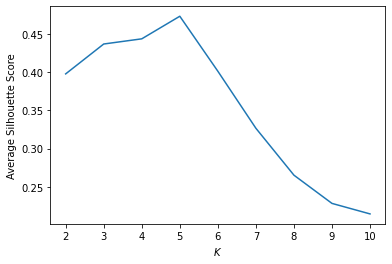

In [ ]:
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

In [ ]:
model = cluster.KMeans(n_clusters=5,random_state=10)
model.fit_predict(df[zcols])
km_silhouette = metrics.silhouette_score(df[zcols], model.labels_)
print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.4731327191810766


In [ ]:
bandwidth = cluster.estimate_bandwidth(df[zcols], quantile=0.1)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df[zcols])
ms_silhouette = metrics.silhouette_score(df[zcols], ms.labels_)
print('mean-shift silhouette score: ' + str(ms_silhouette))

mean-shift silhouette score: 0.4728737238194506


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff5e2091-543c-4b2c-9a56-1e41bbaff775' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>